# Projec | Time Series Analysis

# Final Project Power consuption Predictiom

Date : 17th Feb 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, GRU
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.utils import normalize
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization

from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout

from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense, SimpleRNN

import keras_tuner as kt
import tensorflow as tf

# Importing data

Imorting csv file and making date column as index and converting time from string format to datetime

In [2]:

df=pd.read_csv('Tetuan City power consumption.csv',index_col=0, parse_dates=True, squeeze=True)
print(df.shape)
df.head()

(52416, 8)


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


Sorting the index of dataset

In [3]:
df=df.sort_index()
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
df.tail()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [5]:
# Checking the datatype of index
print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [6]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [7]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

# Data Cleaning and preprocessing

#### Resampling data to 1 hour  time frame and taking mean of the feature for that 1 hour

In [8]:
hourly = df.resample('H').mean()

# dropping power consuption columns
hourly=hourly.drop(columns=['Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'])
print(hourly.shape)
hourly.head()

(8736, 5)


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
DateTime,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833


#### making a dataset for power consumption and resampling them to 1 hour based on sum

In [9]:
hourly_pc=df[['Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].resample('H').sum()

print(hourly_pc.shape)
hourly_pc.head()

(8736, 3)


,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,
2017-01-01 00:00:00,175187.84810,108160.48632,115512.28916
2017-01-01 01:00:00,147943.29114,96470.51672,102257.34940
2017-01-01 02:00:00,132498.22784,85984.19453,94056.86747
2017-01-01 03:00:00,124866.83544,79316.71732,89303.13253
2017-01-01 04:00:00,122855.69620,77529.48328,85902.65060


#### Combining the two 1 hour sampled datasets

In [10]:
df_1hr=hourly.copy()

df_1hr['Zone 1 Power Consumption'] = hourly_pc['Zone 1 Power Consumption']

df_1hr.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
DateTime,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,175187.84810
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,147943.29114
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,132498.22784
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,124866.83544
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,122855.69620


In [11]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [12]:
df_1hr.shape

(8736, 6)

In [13]:
df_1hr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2017-01-01 00:00:00 to 2017-12-30 23:00:00
Freq: H
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               8736 non-null   float64
 1   Humidity                  8736 non-null   float64
 2   Wind Speed                8736 non-null   float64
 3   general diffuse flows     8736 non-null   float64
 4   diffuse flows             8736 non-null   float64
 5   Zone 1 Power Consumption  8736 non-null   float64
dtypes: float64(6)
memory usage: 477.8 KB


In [14]:
len(df_1hr['Wind Speed'][(48):])


8688

Trend of last 48 hours

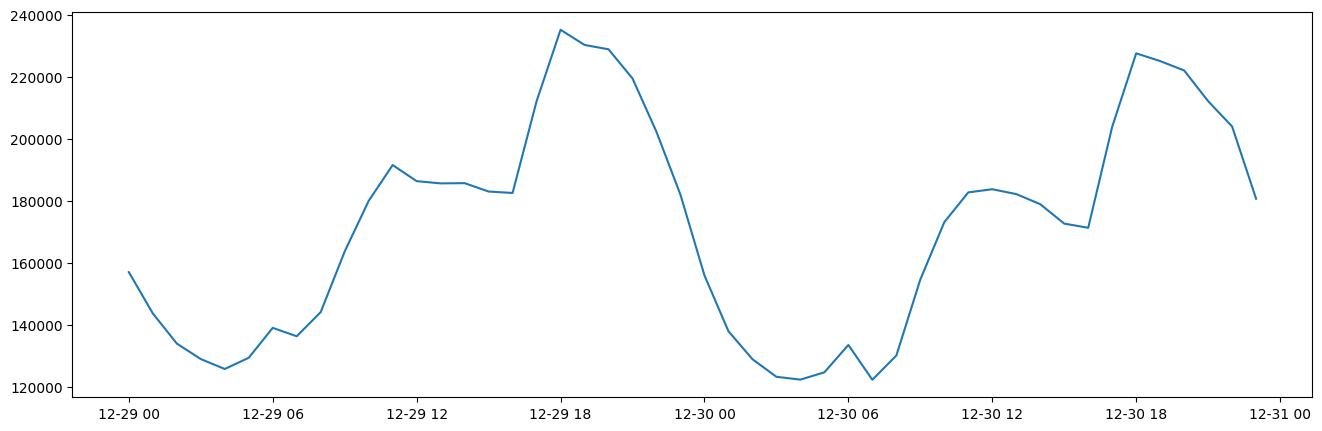

In [15]:
plt.figure(figsize = (16,5))  
plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])

trend of first 48 hours

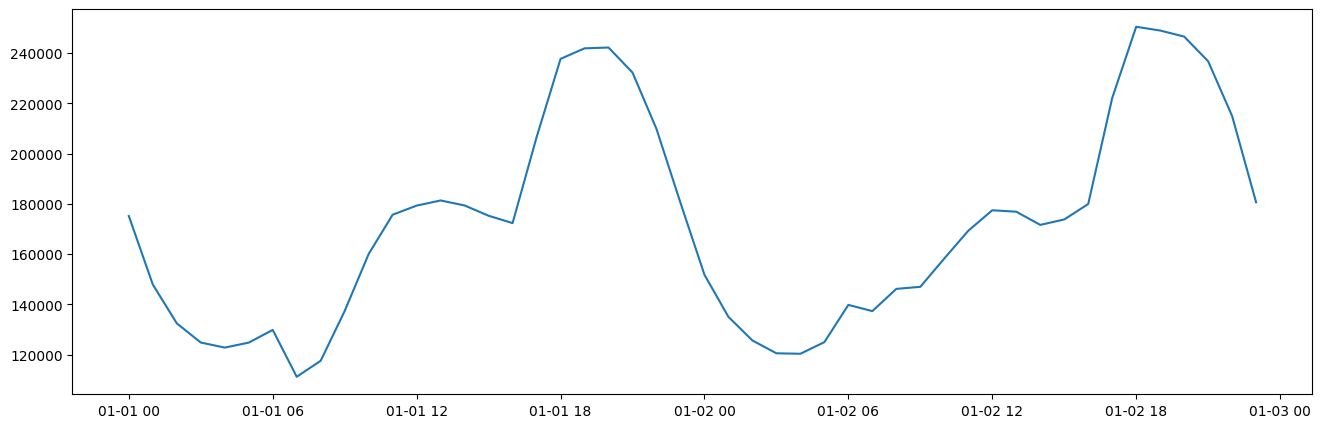

In [16]:
plt.figure(figsize = (16,5))  
plt.plot(df_1hr['Zone 1 Power Consumption'][0:(48)])

In [17]:
data=np.array(df_1hr)

type(data)

numpy.ndarray

 forming dataset into numpy array

In [18]:
data=df_1hr.values

data.shape

(8736, 6)

### In this dataste we will use the data of all 5 features ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','diffuse flows'] for last 6 hours (t-6) and predict the power consumption current at (t=0)

# Making a sequence for the model to learn and make predictions

In [19]:
# df_s=df_1hr.copy()
# column_list=[]
# data_list=[df_s]


def making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption'):
    
    data_list=[]
    df_s=data


    # for input sequence (t-3,t-2,t-1)

    for i in range(input_timesteps, 0, -1):
    # for i in range(last_hours):
        print(i)
        data_list.append(df_s.shift(i))
        
    # for output sequence (t,t+1)
    # for predicting single output
    for i in range(output_at_time):
        print(i)
        data_list.append(df_s[predicting_coulmn_names].shift(-i))

    df_s=pd.concat(data_list,axis=1)

    print(df_s.shape)
    # df_s.head()
    df_s=df_s.dropna()
    print(df_s.shape)
    df_s.head()
    return(df_s)

In [20]:
df_seq=making_sequence(df_1hr,3)

3
2
1
0
(8736, 19)
(8733, 19)


# Scaling and transformation the dataset sequence

In [21]:
def scaling(data):
    values=data.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    print(values.shape)
    return(scaled,scaler)

In [22]:
df_seq=making_sequence(df_1hr,3)

df_seq_scaled,scaler=scaling(df_seq)

3
2
1
0
(8736, 19)
(8733, 19)
(8733, 19)


# Making train - test datastes and X and y

### Making train test datasets

In [23]:

def train_test(data,n_features,n_hours,train_percent,output_at_time):


    train_percent =train_percent/100

    split_percent= round(train_percent * len(data))

    train = data[:split_percent, :]
    print('train',train.shape)
    test = data[split_percent:, :]
    print(test.shape)
    
    
    # split into input and outputs
    n_obs = n_hours * n_features
    trainX, trainy = train[:, :n_obs], train[:, -output_at_time]
    testX, testy = test[:, :n_obs], test[:, -output_at_time]
    print(trainX.shape, len(trainX), trainy.shape)
    # reshape input to be 3D [samples, timesteps, features]
    trainX = trainX.reshape((trainX.shape[0], n_hours, n_features))
    testX = testX.reshape((testX.shape[0], n_hours, n_features))
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return(trainX, trainy,testX, testy)

In [24]:
# making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
df_seq=making_sequence(df_1hr,6)

# scaling(data)
df_seq_scaled,scaler=scaling(df_seq)

# train_test(data,n_features,n_hours,train_percent,output_at_time)
train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

6
5
4
3
2
1
0
(8736, 37)
(8730, 37)
(8730, 37)
train (6984, 37)
(1746, 37)
(6984, 36) 6984 (6984,)
(6984, 6, 6) (6984,) (1746, 6, 6) (1746,)


# Building Models

### Making model for LSTM

In [25]:

def model_LSTM(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Model of RNN

In [26]:

def model_RNN(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Making Evaluation function

In [27]:
df_evalutions=pd.DataFrame(columns=['model_name','train_rmse','test_rmse','train_r2','test_r2'])

In [28]:


def prediction_evaluation(model,model_name,n_hours=6,n_features=6,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
   
    ## For train data

    # make a prediction
    yhat_train = model.predict(train_X)
    print(yhat_train.shape)
    train_X = train_X.reshape((train_X.shape[0], n_hours*n_features))
    print(train_X.shape)
    inv_yhat_train = np.concatenate((train_X,yhat_train), axis=1)
    inv_yhat_train = scaler.inverse_transform(inv_yhat_train)
    inv_yhat_train = inv_yhat_train[:,-1]

    # invert scaling for actual
    train_y = train_y.reshape((len(train_y), 1))

    # inv_y_train = np.concatenate(( train_X[:, -5:],train_y), axis=1)
    inv_y_train = np.concatenate(( train_X,train_y), axis=1)

    inv_y_train = scaler.inverse_transform(inv_y_train)
    # inv_y_train = inv_y[:,0]

    inv_y_train = inv_y_train[:,-1]
    # calculate RMSE
    rmse_train = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
    print('Train RMSE: %.3f' % rmse_train)
    
    r2_train= r2_score(inv_y_train, inv_yhat_train)
    print('Train R2: %.3f' % r2_train)
    
    
    ## For test data

    # make a prediction
    yhat_test = model.predict(test_X)
    print(yhat_test.shape)
    test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
    print(test_X.shape)
    inv_yhat_test = np.concatenate((test_X,yhat_test), axis=1)
    inv_yhat_test = scaler.inverse_transform(inv_yhat_test)
    inv_yhat_test = inv_yhat_test[:,-1]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))

    # inv_y_train = np.concatenate(( test_X[:, -5:],test_y), axis=1)
    inv_y_test = np.concatenate(( test_X,test_y), axis=1)

    inv_y_test = scaler.inverse_transform(inv_y_test)
    # inv_y_train = inv_y[:,0]

    inv_y_test = inv_y_test[:,-1]
    # calculate RMSE
    
    rmse_test = sqrt(mean_squared_error(inv_y_test, inv_yhat_test))
    
    print('Test RMSE: %.3f' % rmse_test)
    
    
    
    r2_test= r2_score(inv_y_test, inv_yhat_test)
    print('Test R2: %.3f' % r2_test)
    
    
    global df_evalutions
    df_evalutions=df_evalutions.append({'model_name':model_name,'train_rmse': rmse_train,'test_rmse': rmse_test,
                                        'train_r2': r2_train,'test_r2': r2_test},ignore_index=True)
    
    return(inv_yhat_train,rmse_train,r2_train,inv_yhat_test,rmse_test,r2_test,inv_y_train,inv_y_test)

# Applying the build models

## Applying LSTM models

6
5
4
3
2
1
0
(8736, 37)
(8730, 37)
(8730, 37)
train (6984, 37)
(1746, 37)
(6984, 36) 6984 (6984,)
(6984, 6, 6) (6984,) (1746, 6, 6) (1746,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 9s - loss: 0.0290 - val_loss: 0.0132 - 9s/epoch - 46ms/step
Epoch 2/25
194/194 - 2s - loss: 0.0121 - val_loss: 0.0083 - 2s/epoch - 10ms/step
Epoch 3/25
194/194 - 2s - loss: 0.0083 - val_loss: 0.0059 - 2s/epoch - 10ms/step
Epoch 4/25
194/194 - 2s - loss: 0.0066 - val_loss: 0.0049 - 2s/e

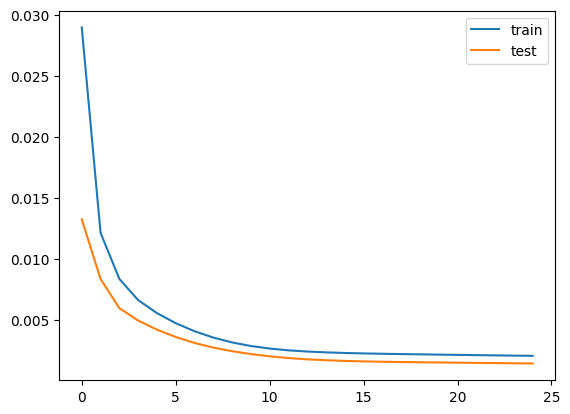

219/219 [==============================] - 3s 6ms/step
(6984, 1)
(6984, 36)
Train RMSE: 11984.812
Train R2: 0.921
55/55 [==============================] - 0s 6ms/step
(1746, 1)
(1746, 36)
Test RMSE: 8447.100
Test R2: 0.947


In [29]:
# making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
df_seq=making_sequence(df_1hr,6)

# scaling(data)
df_seq_scaled,scaler=scaling(df_seq)

# train_test(data,n_features,n_hours,train_percent,output_at_time)
train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_LSTM(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
# hist_LSTM, model_LSTM = model_LSTM(36,25)

hist_LSTM1, model_LSTM1 = model_LSTM(36,25)

# prediction_evaluation(n_hours=6,n_features=6,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
y_pred_train_LSTM1,rmse_train_LSTM1,r2_train_LSTM1,y_pred_test_LSTM1,rmse_test_LSTM1,r2_test_LSTM1,y_train_LSTM1,y_test_LSTM1=prediction_evaluation(model_LSTM1,'LSTM-1')



In [30]:
df_evalutions

,model_name,train_rmse,test_rmse,train_r2,test_r2
0,LSTM-1,11984.812042,8447.099911,0.920977,0.946862


## Applying RNN

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2850      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 5s - loss: 0.0103 - val_loss: 0.0046 - 5s/epoch - 23ms/step
Epoch 2/25
194/194 - 1s - loss: 0.0042 - val_loss: 0.0035 - 1s/epoch - 6ms/step
Epoch 3/25
194/194 - 1s - loss: 0.0034 - val_loss: 0.0029 - 1s/epoch - 7ms/step
Epoch 4/25
194/194 - 1s - loss: 0.0030 - val_loss: 0.0026 - 1s/epoch - 7ms/step
Epoch 5/25
194/194 - 1s - loss: 0.0027 - val_loss: 0.0024 - 1s/epoch - 7ms/step
Epoch 6/25
194/194 - 1s - loss: 0.0025 - val_lo

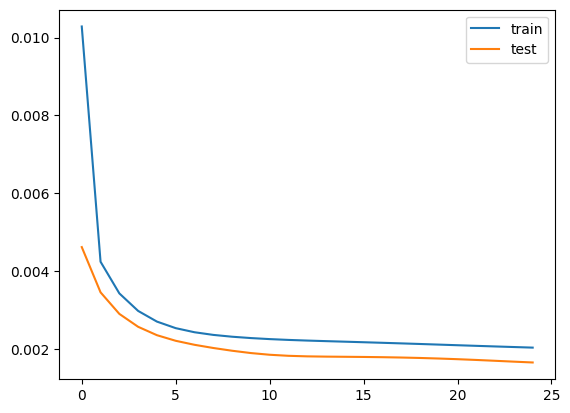

219/219 [==============================] - 1s 4ms/step
(6984, 1)
(6984, 36)
Train RMSE: 14778.392
Train R2: 0.880
55/55 [==============================] - 0s 4ms/step
(1746, 1)
(1746, 36)
Test RMSE: 9158.622
Test R2: 0.938


In [31]:
# # making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
# df_seq=making_sequence(df_1hr,6)

# # scaling(data)
# df_seq_scaled,scaler=scaling(df_seq)

# # train_test(data,n_features,n_hours,train_percent,output_at_time)
# train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_RNN(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
hist_RNN, model_RNN = model_RNN(36,25)

# prediction_evaluation(n_hours=6,n_features=6,,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y))
y_pred_train_RNN,rmse_train_RNN,r2_train_RNN,y_pred_test_RNN,rmse_test_RNN,r2_test_RNN,y_train_RNN,y_test_RNN=prediction_evaluation(model_RNN,'RNN')

In [32]:
df_evalutions 

,model_name,train_rmse,test_rmse,train_r2,test_r2
0,LSTM-1,11984.812042,8447.099911,0.920977,0.946862
1,RNN,14778.392043,9158.622391,0.879844,0.937533


# Reuslts of all models

In [33]:
df_evalutions 

,model_name,train_rmse,test_rmse,train_r2,test_r2
0,LSTM-1,11984.812042,8447.099911,0.920977,0.946862
1,RNN,14778.392043,9158.622391,0.879844,0.937533


In [35]:
df_results_total=df_evalutions.sort_values('test_r2',ascending=False)
df_results_total



,model_name,train_rmse,test_rmse,train_r2,test_r2
0,LSTM-1,11984.812042,8447.099911,0.920977,0.946862
1,RNN,14778.392043,9158.622391,0.879844,0.937533


In [36]:
df_train_results=df_evalutions.copy()

df_train_results=df_train_results.drop(columns=['test_rmse','test_r2'])

df_train_results=df_train_results.sort_values('train_r2',ascending=False)

df_train_results

,model_name,train_rmse,train_r2
0,LSTM-1,11984.812042,0.920977
1,RNN,14778.392043,0.879844


In [37]:
df_test_results=df_evalutions.copy()

df_test_results=df_test_results.drop(columns=['train_rmse','train_r2'])

df_test_results=df_test_results.sort_values('test_r2',ascending=False)

df_test_results

,model_name,test_rmse,test_r2
0,LSTM-1,8447.099911,0.946862
1,RNN,9158.622391,0.937533


# Plots

## Plots of models without optimal Parameters

### LSTM1-1 model without optimal paramters

(0.0, 50.0)

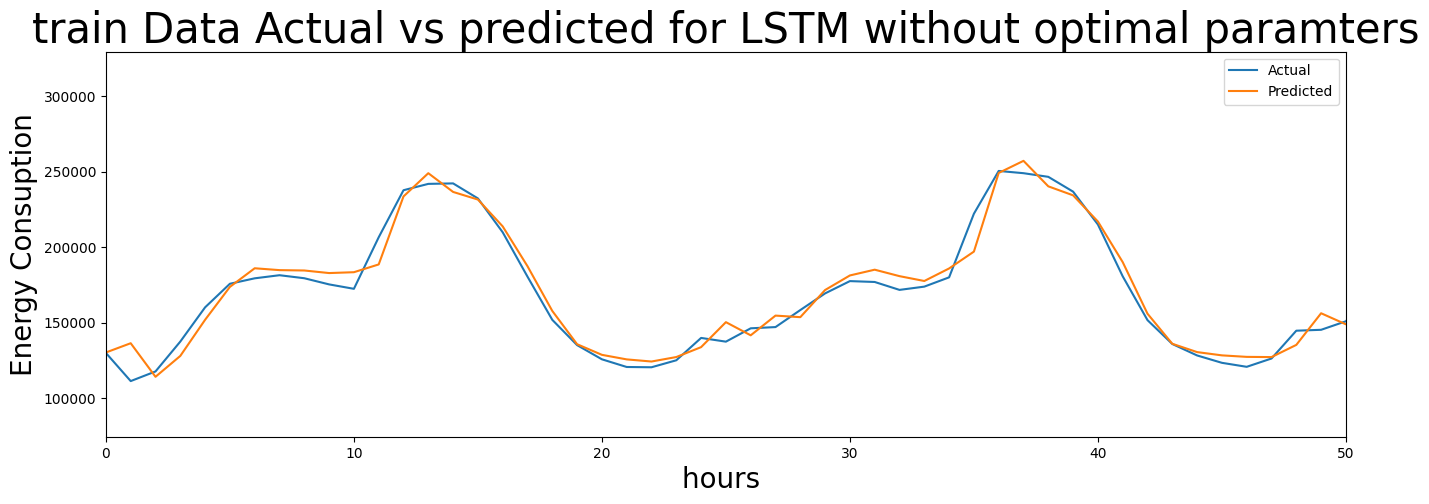

In [39]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_LSTM1,label="Actual")
plt.plot(y_pred_train_LSTM1,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for LSTM without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for LSTM1 model without optimal parameters on t data the Predicted results are smooth and have a minor fluctaions

(0.0, 50.0)

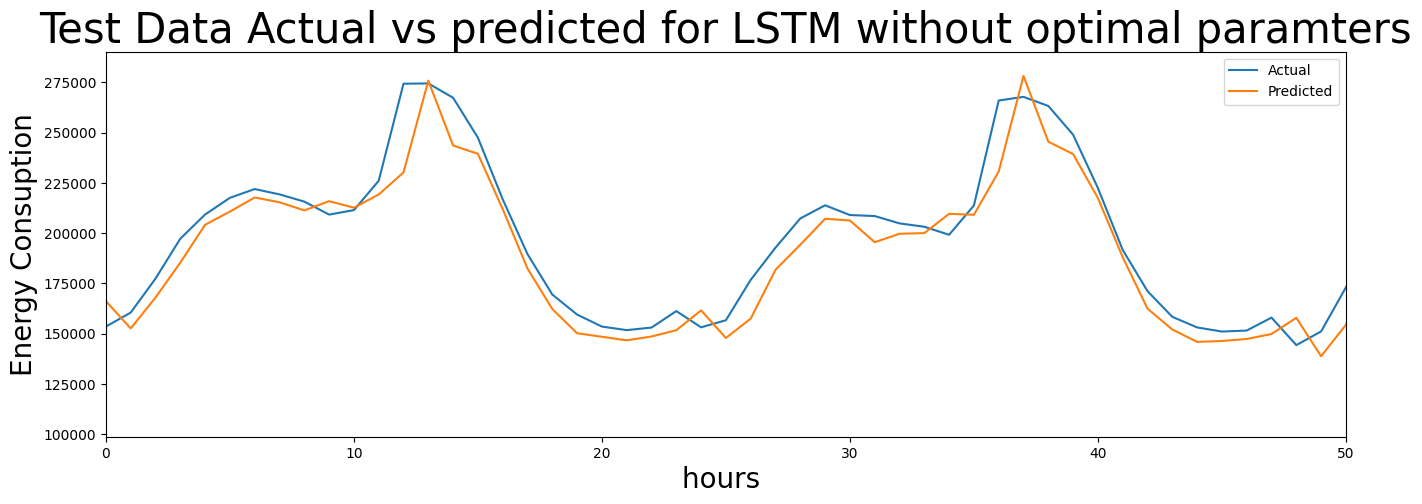

In [40]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_LSTM1,label="Actual")
plt.plot(y_pred_test_LSTM1,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for LSTM without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for LSTM1 model without optimal parameters on test data the Predicted results are not smooth and have a little fluctaions

### RNN model without optimal paramters

(0.0, 50.0)

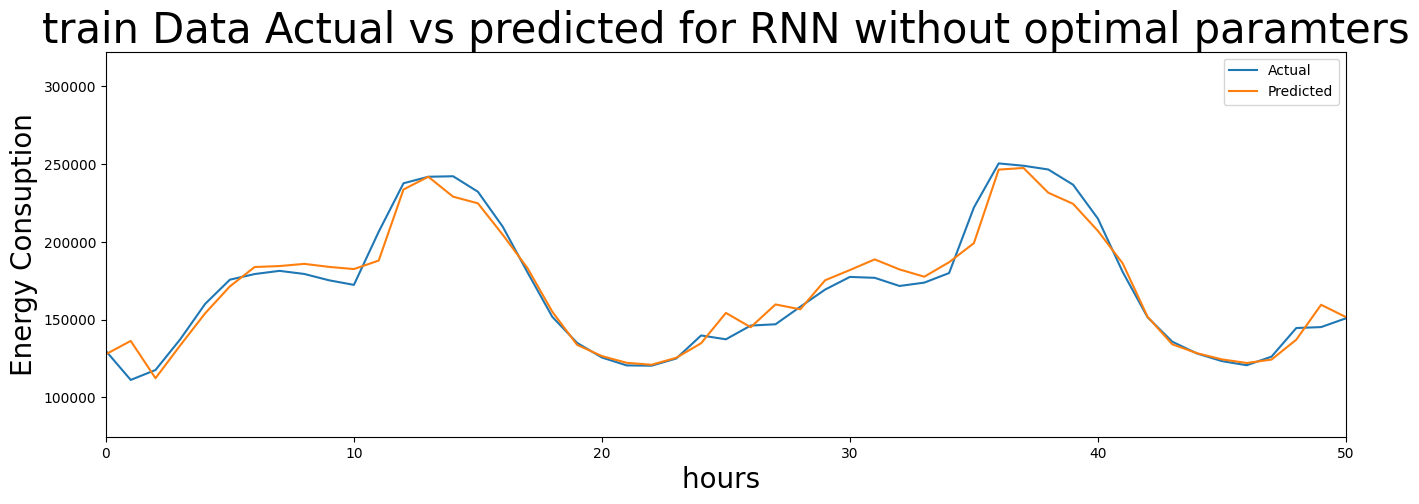

In [41]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_RNN,label="Actual")
plt.plot(y_pred_train_RNN,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for RNN without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for RNN model without optimal parameters on t data the Predicted results are smooth and have a minor fluctaions

(0.0, 50.0)

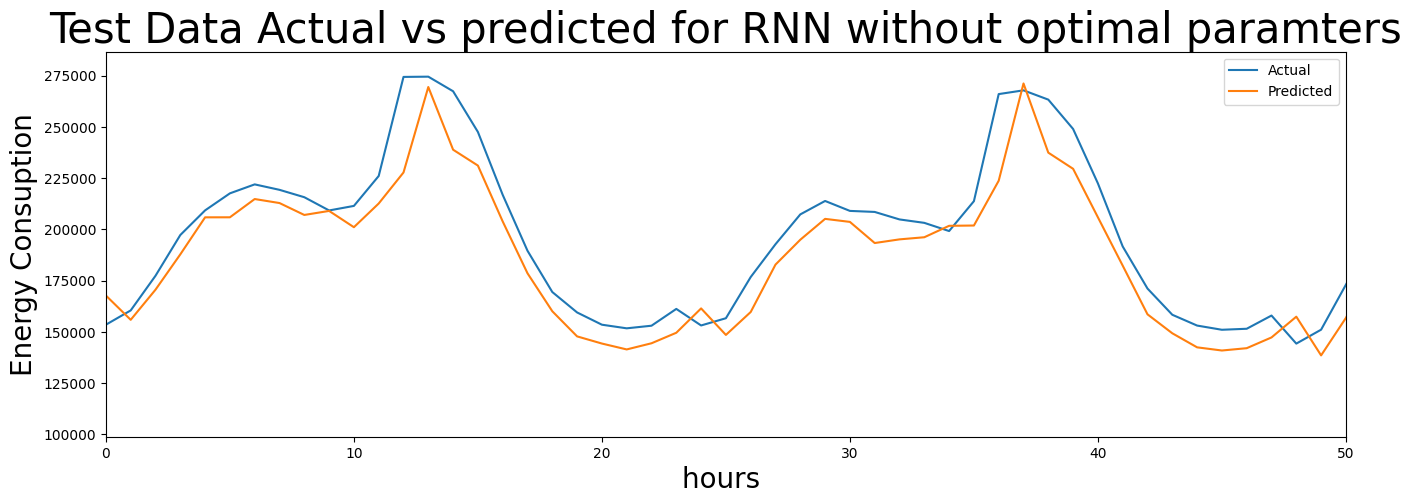

In [42]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_RNN,label="Actual")
plt.plot(y_pred_test_RNN,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for RNN without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for RNN model without optimal parameters on test data the Predicted results are not smooth and have a some differnce

# Conclusions

### LSTM has performed better than RNN and gave good results